In [178]:
import numpy as np
import math
import pandas as pd
from model2 import *
import csv
import matplotlib.pyplot as plt
import pickle

In [180]:
df =  pd.read_csv("ionosphere_csv.csv")
df

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [186]:
def normalize(X):
    s = [ np.mean(dim) for dim in X.T]
    X = np.asarray([np.divide(x, s) for x in X])
    return X

y = df["class"].values
y = np.asarray([[float(yi == 'g')] for yi in y])
#print(y.shape) (351,1)
X = df.drop(["class"], axis=1).values

def partition(X, y, ratio=0.8):
    n = X.shape[0]
    indices = np.arange(n)
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]
    p = int(n*ratio)
    train_X = X[:p]
    test_X = X[p:]
    train_y = y[:p]
    test_y = y[p:]
    return train_X, train_y, test_X, test_y

train_X, train_y, test_X, test_y = partition(X, y, ratio=0.8)


In [191]:
nn = NN([34, 17, 2, 1],activations=['relu', 'relu', 'sigmoid'], usage = 'classification')
#the network architecture is as the constructer

learning_curve = nn.train(train_X, train_y, epochs=35, batch_size=10, lr = .1)

train_CE = nn.calc_error(train_X, train_y)
train_accuracy = nn.calc_accuracy(train_X, train_y)
test_CE = nn.calc_error(test_X, test_y)
test_accuracy = nn.calc_accuracy(test_X, test_y)

train_CE =  0.01534254507168619 
 test_RMS =  0.039579250130772736
train_Accuracy =  0.9821428571428571 
 test_Accuracy =  0.9577464788732394
train_ErrorRate =  0.017857142857142905 
 test_ErrorRate =  0.04225352112676062


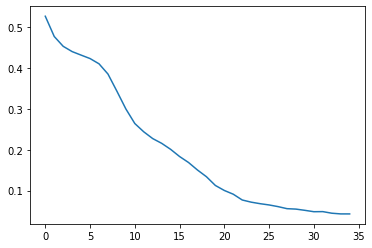

In [192]:
plt.plot(np.arange(len(learning_curve)), learning_curve)
print('train_CE = ', train_CE, '\n', 'test_RMS = ', test_CE)
print('train_Accuracy = ', train_accuracy, '\n', 'test_Accuracy = ', test_accuracy)
print('train_ErrorRate = ', 1-train_accuracy, '\n', 'test_ErrorRate = ', 1-test_accuracy)

train_CE =  0.015115380284795173 
 test_RMS =  0.04359190377126048
train_Accuracy =  0.9892857142857143 
 test_Accuracy =  0.9577464788732394
train_ErrorRate =  0.010714285714285676 
 test_ErrorRate =  0.04225352112676062


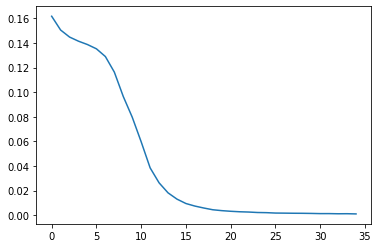

In [193]:
nn2 = NN([34, 17, 3, 1],activations=['relu', 'relu',  'sigmoid'], usage = 'classification')
#the network architecture is as the constructer

learning_curve = nn2.train(train_X, train_y, epochs=35, batch_size=10, lr = .1)

train_CE = nn2.calc_error(train_X, train_y)
train_accuracy = nn2.calc_accuracy(train_X, train_y)
test_CE = nn2.calc_error(test_X, test_y)
test_accuracy = nn2.calc_accuracy(test_X, test_y)

plt.plot(np.arange(len(learning_curve)), learning_curve)

print('train_CE = ', train_CE, '\n', 'test_RMS = ', test_CE)
print('train_Accuracy = ', train_accuracy, '\n', 'test_Accuracy = ', test_accuracy)
print('train_ErrorRate = ', 1-train_accuracy, '\n', 'test_ErrorRate = ', 1-test_accuracy)

In [194]:
def plot2D(nn, X):
    _, a_s = nn.feedforward(X.T)
    cos = a_s[-2]
    label = a_s[-1]
    n = a_s[-2].shape[1]
    assert(a_s[-2].shape[0] == 2)
    colors = ("red", "blue")
    groups = ("good", "bad")

    for i in range(n):
        k = int(label[0][i]>=0.5)
        plt.scatter(cos[0][i], cos[1][i], c=colors[k], edgecolors='none')

    plt.title('2D hidden feature scatter graph')
    plt.show()
    
from mpl_toolkits.mplot3d import Axes3D

def plot3D(nn, X):
    _, a_s = nn.feedforward(X.T)
    cos = a_s[-2]
    label = a_s[-1]
    n = a_s[-2].shape[1]
    assert(a_s[-2].shape[0] == 3)
    colors = ("red", "blue")
    groups = ("good", "bad")
    
    fig = plt.figure()
    ax = Axes3D(fig)
    for i in range(n):
        k = int(label[0][i]>=0.5)
        ax.scatter(cos[0][i], cos[1][i], cos[2][i], c=colors[k])

    plt.title('3D hidden feature scatter graph')
    plt.show()

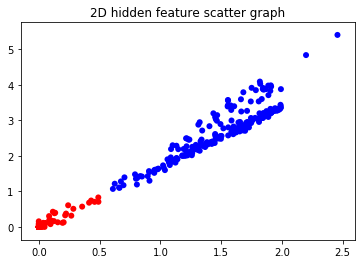

In [195]:
plot2D(nn, X)

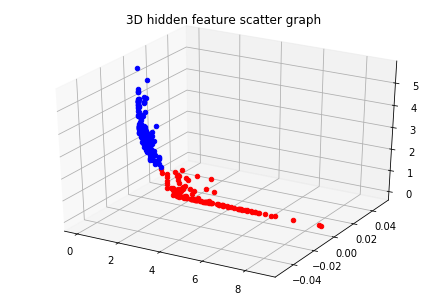

In [196]:
plot3D(nn2, X)

In [200]:
file_train_csv = "class_trainning_pred.csv" 
file_test_csv = "class_testing_pred.csv" 
with open(file_train_csv, 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(['prediction', 'label'])
    for i in range(train_X.shape[0]):
        writer.writerow([nn.prediction(np.asarray([train_X[i]]))[0][0], train_y[i][0]])
with open(file_test_csv, 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(['prediction', 'label'])
    for i in range(test_X.shape[0]):
        writer.writerow([nn.prediction(np.asarray([test_X[i]]))[0][0], test_y[i][0]])

In [202]:
#savefilename = "save_class_2D"
#savefilename2 = "save_class_3D"
#with open(savefilename, 'wb') as fo:
#    pickle.dump(nn, fo)
#with open(savefilename2, 'wb') as fo:
#    pickle.dump(nn2, fo)